# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 6: *GeneralizedHoughTransform*
Shape detection by the generalized Hough transform 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageF, plotImageL, createImageF
from ImageOperatorsUtilities import applyCannyEdgeDetector
from PlotUtilities import plot3DHistogram 

# Math and iteration
from math import pi
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    templateName = Input image of a template
    gaussianKernelSize = Gaussian kernel size. Filter noise
    sobelKernelSize = Sobel kernel size. Edge detection
    upperT = Upper threshold
    lowerT = Lower threshold
    numEntries = Size of the R table

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter6/Input/")
imageName = "Crossing.png"
templateName = "CrossingTemplate.png"
gaussianKernelSize = 5
sobelKernelSize = 3
upperT = 0.35
lowerT = 0.05
numEntries = 90

### Read image and template and show

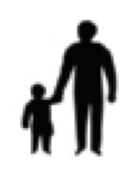

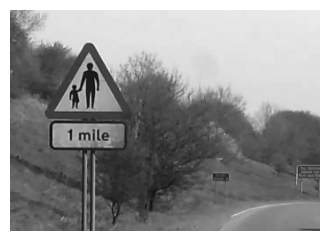

In [3]:
templateImage, widthTemplate, heightTemplate = imageReadL(pathToDir + templateName)
inputImage, width, height = imageReadL(pathToDir + imageName)
plotImageL(templateImage, figureSize = 2) 
plotImageL(inputImage, figureSize = 4) 

### Compute edges

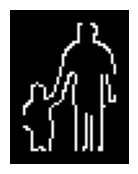

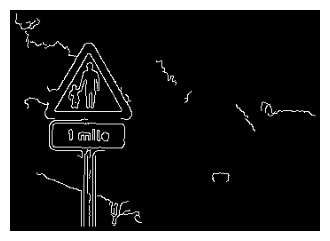

In [4]:
magnitudeTemplate, angleTemplate = applyCannyEdgeDetector(templateImage, gaussianKernelSize, sobelKernelSize, upperT, lowerT)
magnitude, angle = applyCannyEdgeDetector(inputImage, gaussianKernelSize, sobelKernelSize, upperT, lowerT)
plotImageF(magnitudeTemplate, figureSize = 2) 
plotImageF(magnitude, figureSize = 4) 

### Compute reference point in the template

In [5]:
refPoint = [0,0]
edgePoints = []
for x,y in itertools.product(range(0, widthTemplate), range(0, heightTemplate)):
    if magnitudeTemplate[y,x] != 0:
        refPoint[0] += y
        refPoint[1] += x
        edgePoints.append((y,x))
numPts = len(edgePoints)
refPoint = [int(refPoint[0]/numPts),int(refPoint[1]/numPts)]

### Build Rtable as a list of lists

In [6]:
rTable = [[] for entryIndex in range(numEntries)]
deltaAngle = 2.0 * pi / (numEntries - 1.0)
for p in range(0, numPts):
    y, x = (edgePoints[p])[0], (edgePoints[p])[1]
    
    # The angle is in the interval -pi,+pi
    ang = angleTemplate[y,x] + pi
    entryIndex = int(ang/deltaAngle)
    entry = rTable[entryIndex]
    entry.append((y-refPoint[0], x-refPoint[1]))

### Gather evidence of the template in the image

In [7]:
accumulator = createImageF(width, height)
maxSegmentLenght = 0
for x,y in itertools.product(range(0, width), range(0, height)):
    if magnitude[y,x] != 0:
        # The angle is in the interval -pi,+pi
        ang = angle[y,x] + pi
        entryIndex = int(ang/deltaAngle)
        row = rTable[entryIndex]
        numPts = len(row)
        for p in range(0, numPts):
            x0, y0 = x - (row[p])[1], y - (row[p])[0] 
            if y0>0 and x0>0 and y0<height and x0<width: 
                accumulator[y0][x0] += 1 

### Plot accumulator

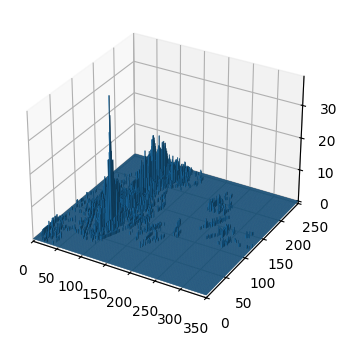

In [8]:
plot3DHistogram(accumulator)